In [1]:
import pandas as pd
data=pd.read_csv("Big Mart Sales.csv")
testdata=pd.read_csv("Big Mart Sales Test.csv")
traindata=pd.read_csv("Big Mart Sales Test.csv")

In [2]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
testdata.shape[1]

11

In [4]:
testdata.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
data[data==0].count()

Item_Identifier                0
Item_Weight                    0
Item_Fat_Content               0
Item_Visibility              526
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                    0
Outlet_Location_Type           0
Outlet_Type                    0
Item_Outlet_Sales              0
dtype: int64

In [6]:
testdata[testdata==0].count()

Item_Identifier                0
Item_Weight                    0
Item_Fat_Content               0
Item_Visibility              353
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                    0
Outlet_Location_Type           0
Outlet_Type                    0
dtype: int64

In [7]:
#treat zero value 

In [8]:
for i in data["Item_Type"].unique():
    li=list(data[(data["Item_Visibility"]==0.0 )&(data["Item_Type"]==i)].index)
    data["Item_Visibility"][li]=data["Item_Visibility"][data["Item_Type"]==i].mean()

C:\Users\welcome\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
for i in testdata["Item_Type"].unique():
    li=list(testdata[(testdata["Item_Visibility"]==0.0 )&(testdata["Item_Type"]==i)].index)
    testdata["Item_Visibility"][li]=testdata["Item_Visibility"][testdata["Item_Type"]==i].mean()

C:\Users\welcome\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
data.drop('Outlet_Location_Type',axis=1,inplace=True)
testdata.drop('Outlet_Location_Type',axis=1,inplace=True)

In [11]:
#null values 

In [12]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [13]:
testdata.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Type                     0
dtype: int64

In [14]:
data.drop("Outlet_Size",axis=1,inplace=True)

In [15]:
testdata.drop("Outlet_Size",axis=1,inplace=True)

In [16]:
for i in data["Item_Type"].unique():
    li=list(data[(data["Item_Weight"].isnull()) & (data["Item_Type"]==i)].index)
    data["Item_Weight"][li]=data["Item_Weight"][data["Item_Type"]==i].mean()

C:\Users\welcome\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
for i in testdata["Item_Type"].unique():
    li=list(testdata[(testdata["Item_Weight"].isnull()) &( testdata["Item_Type"]==i)].index)
    testdata["Item_Weight"][li]=testdata["Item_Weight"][testdata["Item_Type"]==i].mean()


C:\Users\welcome\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [18]:
testdata.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Type                  0
dtype: int64

In [19]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [20]:
import matplotlib.pyplot as plt
plt.scatter(data["Item_Weight"].index,data["Item_Weight"])

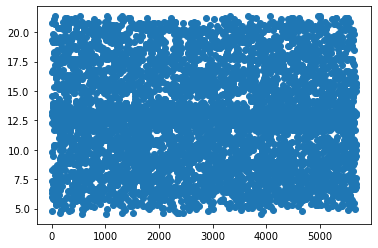

In [21]:
plt.scatter(testdata["Item_Weight"].index,testdata["Item_Weight"])

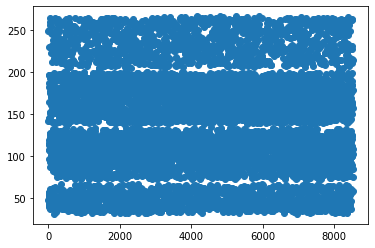

In [22]:
plt.scatter(data["Item_MRP"].index,data["Item_MRP"])

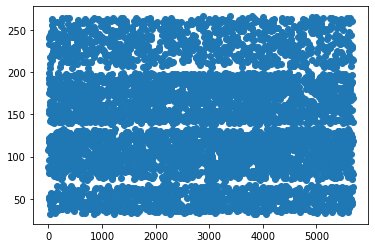

In [23]:
plt.scatter(testdata["Item_MRP"].index,testdata["Item_MRP"])

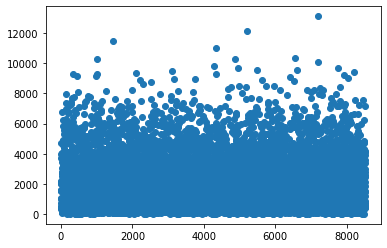

In [24]:
plt.scatter(data["Item_Outlet_Sales"].index,data["Item_Outlet_Sales"])

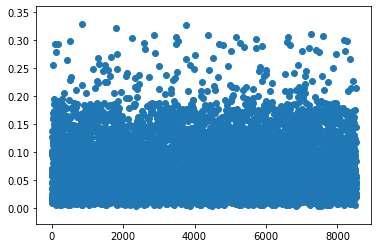

In [25]:
plt.scatter(data["Item_Visibility"].index,data["Item_Visibility"])

In [26]:
from scipy.stats import stats

In [27]:
from sklearn import preprocessing

In [28]:
encoder=preprocessing.LabelEncoder()

In [29]:
for i in data.columns:
    if isinstance(data[i][0],str):
        data[i]=encoder.fit_transform(data[i])

In [30]:
for i in testdata.columns:
    if isinstance(testdata[i][0],str):
        testdata[i]=encoder.fit_transform(testdata[i])

In [31]:
#feature selection


In [32]:
x=data.drop("Item_Outlet_Sales",axis=1)
y=data["Item_Outlet_Sales"]

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
x_vif=add_constant(x)

C:\Users\welcome\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [34]:
s=pd.Series([variance_inflation_factor(x_vif.values,i) for i in range(x_vif.shape[1])],index=x_vif.columns)
s

const                        59034.519146
Item_Identifier                  1.014780
Item_Weight                      1.005101
Item_Fat_Content                 1.024907
Item_Visibility                  1.055121
Item_Type                        1.017979
Item_MRP                         1.001897
Outlet_Identifier                1.025760
Outlet_Establishment_Year        1.033626
Outlet_Type                      1.063100
dtype: float64

In [35]:
#anova


In [36]:
v=x.drop(["Item_Weight","Item_MRP","Item_Visibility"],axis=1)

In [37]:
for i in v.columns:
    w=stats.f_oneway(v[i],y)
    print(w,i)
    

F_onewayResult(statistic=5376.678812390217, pvalue=0.0) Item_Identifier
F_onewayResult(statistic=13907.881231443058, pvalue=0.0) Item_Fat_Content
F_onewayResult(statistic=13833.15995930199, pvalue=0.0) Item_Type
F_onewayResult(statistic=13865.094451561126, pvalue=0.0) Outlet_Identifier
F_onewayResult(statistic=98.50050190099135, pvalue=3.7550906992171747e-23) Outlet_Establishment_Year
F_onewayResult(statistic=13910.02565005293, pvalue=0.0) Outlet_Type


In [38]:
#correlation coefficient

In [39]:
import numpy as np
columns = list(x.columns)
columns.remove('Item_Identifier')
columns.remove('Item_Fat_Content')
columns.remove('Item_Type')
columns.remove('Outlet_Establishment_Year')
columns.remove('Outlet_Type')
columns.remove('Outlet_Identifier')
print(columns)

correlation = pd.Series([np.abs(np.corrcoef(x[i],y)[0,1]) 
                         for i in columns], index=columns)
correlation

['Item_Weight', 'Item_Visibility', 'Item_MRP']


Item_Weight        0.012088
Item_Visibility    0.133940
Item_MRP           0.567574
dtype: float64

In [40]:

#normalisation 
from sklearn.preprocessing import normalize
x=normalize(x)


In [41]:
y=np.log(y)

In [42]:
#from sklearn.preprocessing import PolynomialFeatures
#s=PolynomialFeatures(degree=3)
#x=s.fit_transform(x)


In [43]:
#from sklearn.preprocessing import StandardScaler
#sc=StandardScaler()
#x=sc.fit_transform(x)

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
train_x,test_x,train_y,test_y=train_test_split(x,y,train_size=0.6,random_state=1)

In [46]:
#from sklearn.linear_model import LinearRegression

In [47]:
#lg=LinearRegression()

In [48]:
#lg.fit(train_x,train_y)

In [49]:
#lg.score(train_x,train_y)

In [50]:
#lg.score(test_x,test_y)

In [51]:
#linear Regression give me 50% accuracy
#random forest there is no need of feature selection
#random forest

In [52]:
from sklearn.ensemble import RandomForestRegressor
rg=RandomForestRegressor(n_estimators=200,max_depth=5)
rg.fit(train_x,train_y)



RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [53]:
rg.score(train_x,train_y)

0.7456814782214612

In [54]:
rg.score(test_x,test_y)

0.7378153889170627

In [55]:
#using xgboost

In [56]:

from xgboost import XGBRegressor

In [57]:
xg=XGBRegressor(n_estimators=80,max_depth=5)

In [58]:
xg.fit(train_x,train_y)

C:\Users\welcome\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:59:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=80,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [59]:
xg.score(train_x,train_y)

0.8043019640461113

In [60]:
xg.score(test_x,test_y)

0.7339515358631794

In [61]:
#using xgboost fit input data and output data

In [62]:
xg.fit(x,y)

C:\Users\welcome\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:59:34] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=80,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [67]:
#prediction on test data
testdata=normalize(testdata)

from sklearn.preprocessing import Imputer


imputer=Imputer(missing_values="NaN",strategy="mean",axis=0)

In [65]:
testdata.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Type
0,1103,20.75000,1,0.007565,13,107.8622,9,1999,1
1,1067,8.30000,4,0.038428,4,87.3198,2,2007,1
2,1406,14.60000,1,0.099575,11,241.7538,0,1998,0
3,809,7.31500,1,0.015388,13,155.0340,2,2007,1
4,1184,12.95504,2,0.118599,4,234.2300,5,1985,3


imputer.fit(traindata.iloc[:,2])


for i in traindata.columns:
    if isinstance(traindata[i][0],str):
        traindata[i]=encoder.fit_transform(traindata[i])

In [68]:
xgpredict=xg.predict(testdata)

In [71]:
xreal=np.exp(xgpredict)

In [72]:
A=pd.DataFrame(xreal,columns=["Item_Outlet_Sales"])
A


,Item_Outlet_Sales
0,1689.584839
1,1244.093018
2,439.381348
3,2265.807617
4,5496.002930
...,...
5676,2109.054443
5677,2251.888184
5678,1710.240601
5679,3219.706299


In [73]:
traindata["Item_Outlet_Sales"]=A

In [74]:
traindata.head(7)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,1689.584839
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,1244.093018
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,439.381348
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,2265.807617
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,5496.002930
5,FDH56,9.800,Regular,0.063817,Fruits and Vegetables,117.1492,OUT046,1997,Small,Tier 1,Supermarket Type1,1716.677246
6,FDL48,19.350,Regular,0.082602,Baking Goods,50.1034,OUT018,2009,Medium,Tier 3,Supermarket Type2,589.807373


In [75]:
traindata.groupby("Item_Type").mean()["Item_Outlet_Sales"]

Item_Type
Baking Goods             1785.010010
Breads                   1858.368042
Breakfast                1827.312378
Canned                   1895.224121
Dairy                    2023.904053
Frozen Foods             1819.195312
Fruits and Vegetables    1965.370239
Hard Drinks              1856.822998
Health and Hygiene       1898.170288
Household                2020.594971
Meat                     1930.433105
Others                   1926.326416
Seafood                  2237.311523
Snack Foods              2026.048828
Soft Drinks              1953.036743
Starchy Foods            2122.144775
Name: Item_Outlet_Sales, dtype: float32

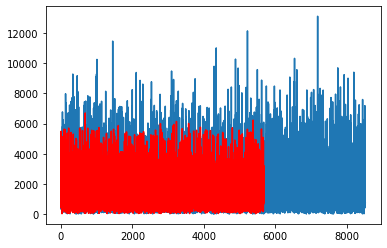

In [77]:
plt.plot(data.index,data["Item_Outlet_Sales"])
plt.plot(traindata.index,traindata["Item_Outlet_Sales"],color="r")